# Loading Real Data as an input for a model

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import plotly.express as px
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time


In [1]:
# To open images and operate with them we will use PIL
# Among other libraries to load paths
import os
from PIL import Image
from IPython.display import display
import warnings

# Ignoring some warnings
warnings.filterwarnings('ignore')


------------

## Exploring the Imageset

Loading the dataset

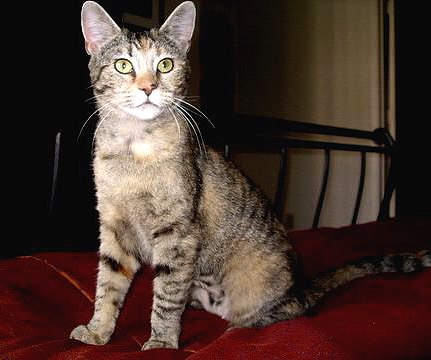

In [3]:
# We will load the Cats & Dogs dataset
with Image.open('../Course Resources/Data/CATS_DOGS/test/CAT/10000.jpg') as im:
    display(im)

In [4]:
# Loading path
path = '../Course Resources/Data/CATS_DOGS/'
img_names = []

# Getting all filenames
for folders, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folders + '/' + img)

# Check how many images we have
len(img_names)

24994

In [5]:
# Getting insights of the images
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)

# Check how many accepted and rejected
print(f'Accepted images: {len(img_sizes)}')
print(f'Rejected images: {len(rejected)}')

24994
0


In [6]:
# Converting to a dataframe
df = pd.DataFrame(img_sizes, columns=['width', 'height'])

df.head()

,width,height
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240


In [8]:
# Let's check data from the width
df['width'].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: width, dtype: float64

In [9]:
# Let's check data from the height
df['height'].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: height, dtype: float64